In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import math
import datetime
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

In [2]:
#####################################
##### Assignment 3 ~~MV & GH~~ #####
#####################################

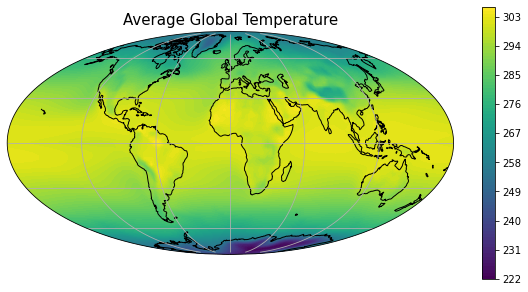

In [15]:
#Mollweide Map Plot
#File Open & Variable Assign
#You can take the average of a numpy array using np.mean and specifying which dimension(axis) to average over.
dataset = Dataset("/projects/b1045/cmip/CMIP5/NCL_Practice/tas_Amon_CESM1-WACCM_rcp85_r2i1p1_200601-209912.nc")
lats = np.array(dataset.variables['lat'])
lons = np.array(dataset.variables['lon'])
tas = np.array(dataset.variables['tas'])#--Think about converting this to celsius like in Assg 1 & 2
avg_tas = np.mean(tas, axis=0)
##########-Code for removing the ugly white line-#############
avg_tas_cyc, lons_cyc = add_cyclic_point(avg_tas, coord=lons)#
##############################################################
ax = plt.axes(projection=ccrs.Mollweide())
plt.contourf(lons_cyc, lats, avg_tas_cyc, levels=100, transform=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
plt.rcParams['figure.figsize']=10,10
plt.colorbar(shrink=.5)
plt.title('Average Global Temperature')
plt.show()

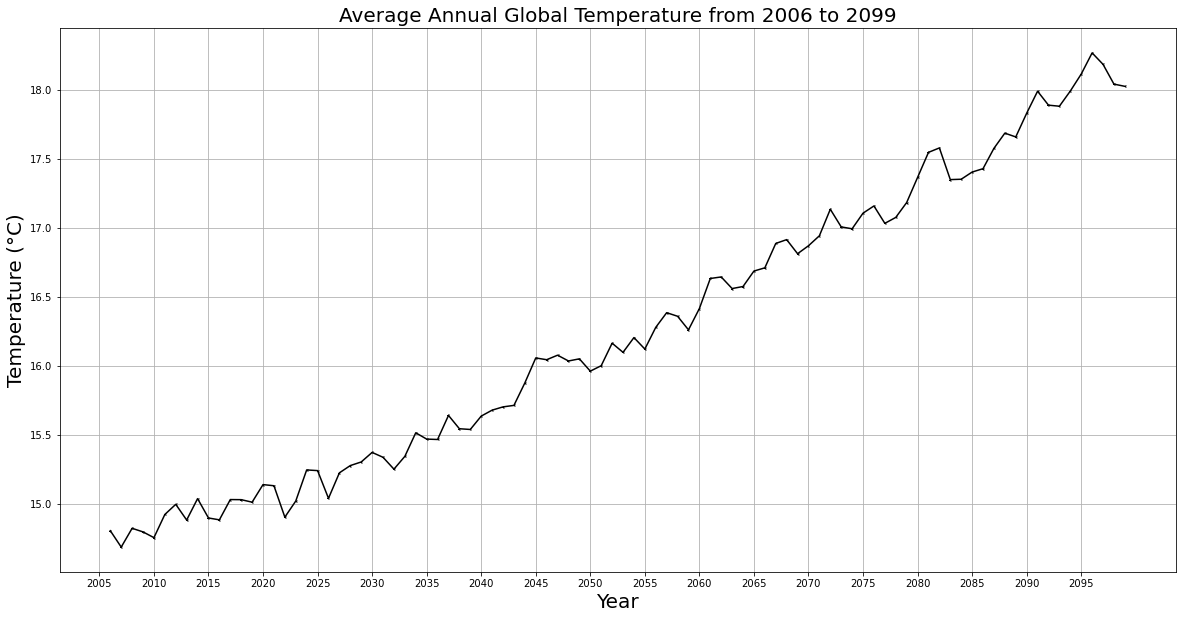

In [17]:
#File Open & Variable Assign
dataset = Dataset("/projects/b1045/cmip/CMIP5/NCL_Practice/tas_Amon_CESM1-WACCM_rcp85_r2i1p1_200601-209912.nc")
lats = np.array(dataset.variables['lat'])
tas = np.array(dataset.variables['tas'])

#Making an Array of 96 Cosine Weights based on latitude
cos_weights = []
for i in lats:
    m = i * ((math.pi) / 180)
    n = math.cos(m)
    cos_weights.append(n)
weights = np.array(cos_weights)

#Multiplying tas by weights
for i in range(len(tas)):
    weighted_tas = weights.reshape((weights.size, 1)) * tas[i]
    tas[i] = weighted_tas
sum_of_weights = np.sum(weights)

#Creating Weighted means for each date (out of 1128)
weighted_means = []
for i in range(len(tas)):
    single_weighted_mean = (np.sum(tas[i])) / (144 * sum_of_weights)
    weighted_means.append(single_weighted_mean)

#Converting From K to C
wma_k = np.array(weighted_means)
wma_c = wma_k - 273.15
weighted_means = wma_c.tolist()

#List of all 94 years -- You could also try doing this using a for loop
list_years = []
for i in range(2006, 2100):
    list_years.append(i)

#Creating list of average annual temperature
avg_yearly_temp = []
for i in range(0, 94):
    yearly_avg = sum(weighted_means[(12 * i):(12 * (i + 1))]) / 12
    avg_yearly_temp.append(yearly_avg)

#Creating the plot
plt.plot(list_years, avg_yearly_temp, '3', linestyle='-', color='k', markersize='3')
plt.xticks(np.arange(min(list_years) - 1, max(list_years) + 1, step=5))
plt.rcParams['figure.figsize']=20,10
plt.ylabel('Temperature (°C)')
plt.xlabel('Year')
plt.rc('axes', labelsize=20)
plt.title('Average Annual Global Temperature from 2006 to 2099')
plt.rc('axes', titlesize=20)
plt.grid()
plt.savefig('assg3_avgGlobalTemp.pdf')
plt.show()

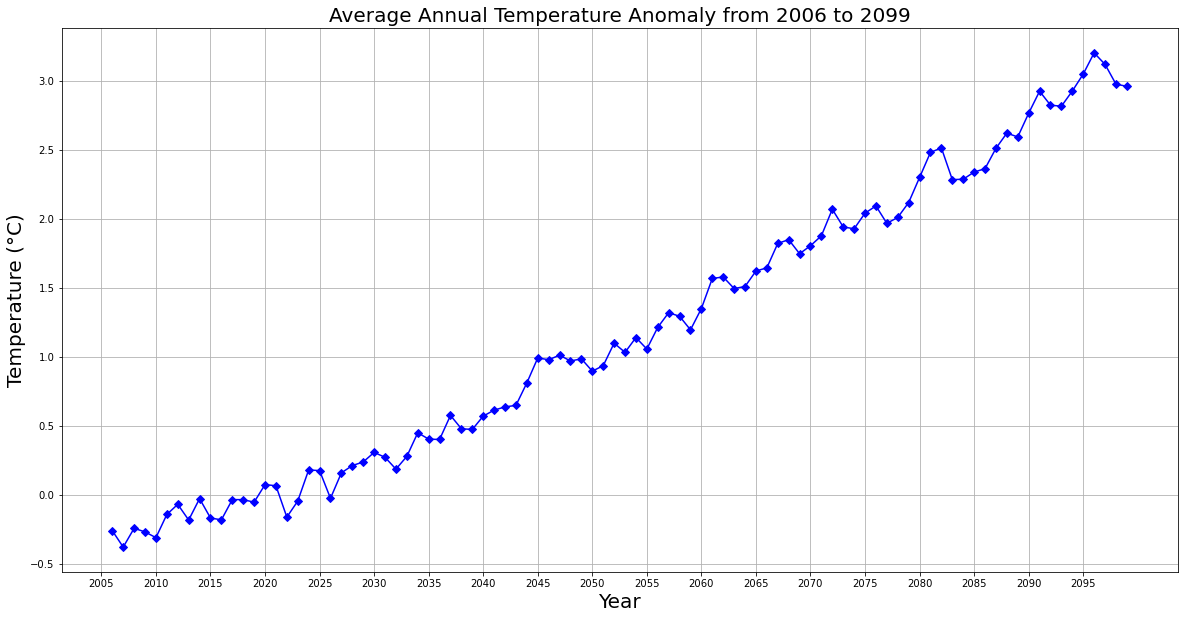

In [5]:
#Creating 2006-2035 Baseline temp. avg.
num_years = 2035 - 2006
baseline_list = avg_yearly_temp[:num_years]
baseline = sum(baseline_list) / len(baseline_list)

#Creating our temp anomaly list
temp_anomalies = []
for i in avg_yearly_temp:
    single_anomaly = i - baseline
    temp_anomalies.append(single_anomaly)

#Creating our anomaly plot
plt.plot(list_years, temp_anomalies, 'D', linestyle='-', color='b')
plt.xticks(np.arange(min(list_years) - 1, max(list_years) + 1, step=5))
plt.ylabel('Temperature (°C)')
plt.xlabel('Year')
plt.title('Average Annual Temperature Anomaly from 2006 to 2099')
plt.rcParams['figure.figsize']=20,10
plt.grid()
plt.savefig('assg3_tempAnomaly.pdf')
plt.show()

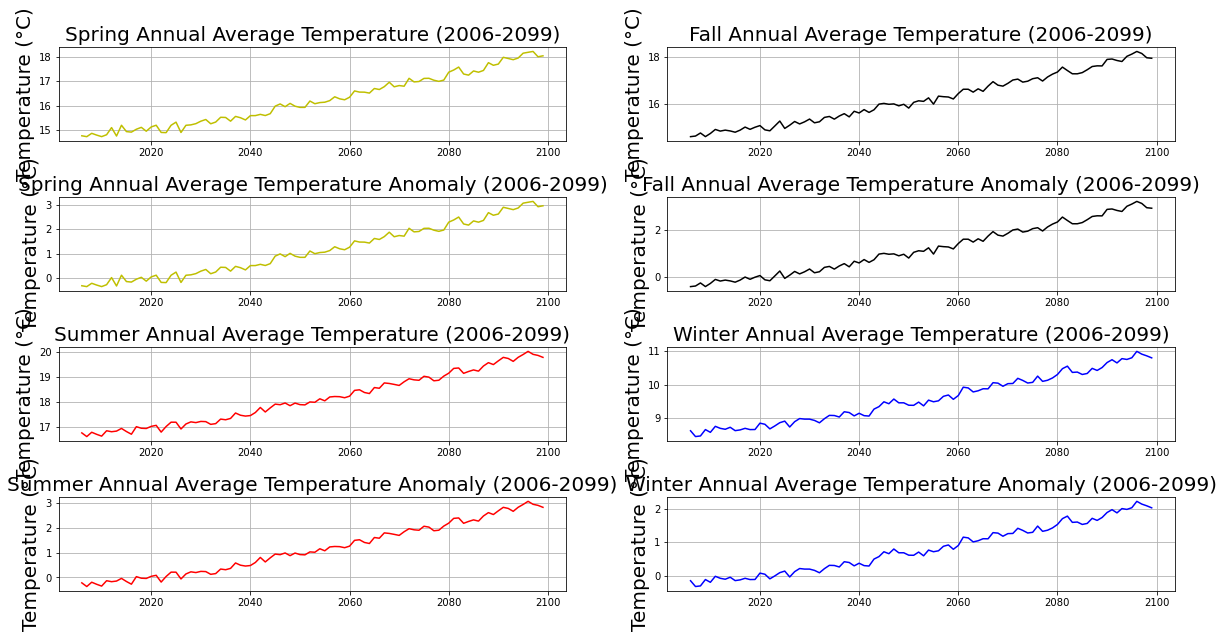

In [6]:
#If the code below doesn't make sense or you'd like to see it done another way slack Grace, who modified this one nicely


##### SPRING #####
spring_values = []
for i in range(0, 94):
    first_ind = (12 * i) + 2
    second_ind = (12 * i) + 5
    single_spring_avg = sum(weighted_means[first_ind:second_ind]) / 3
    spring_values.append(single_spring_avg)
#Creating spring 2006-2035 Baseline temp. avg.
num_years = 2035 - 2006
spring_baseline_list = spring_values[:num_years + 1]
spring_baseline = sum(spring_baseline_list) / len(spring_baseline_list)

#Creating our spring temp anomaly list
spring_anomalies = []
for i in spring_values:
    spring_anomaly = i - spring_baseline
    spring_anomalies.append(spring_anomaly)
    

    
##### SUMMER #####   
summer_values = []
for i in range(0, 94):
    first_ind = (12 * i) + 5
    second_ind = (12 * i) + 8
    single_summer_avg = sum(weighted_means[first_ind:second_ind]) / 3
    summer_values.append(single_summer_avg)
#Creating summer 2006-2035 Baseline temp. avg.
num_years = 2035 - 2006
summer_baseline_list = summer_values[:num_years + 1]
summer_baseline = sum(summer_baseline_list) / len(summer_baseline_list)

#Creating our summer temp anomaly list
summer_anomalies = []
for i in summer_values:
    summer_anomaly = i - summer_baseline
    summer_anomalies.append(summer_anomaly)
    


##### FALL #####
fall_values = []
for i in range(0, 94):
    first_ind = (12 * i) + 8
    second_ind = (12 * i) + 11
    single_fall_avg = sum(weighted_means[first_ind:second_ind]) / 3
    fall_values.append(single_fall_avg)
#Creating fall 2006-2035 Baseline temp. avg.
num_years = 2035 - 2006
fall_baseline_list = fall_values[:num_years + 1]
fall_baseline = sum(fall_baseline_list) / len(fall_baseline_list)

#Creating our fall temp anomaly list
fall_anomalies = []
for i in fall_values:
    fall_anomaly = i - fall_baseline
    fall_anomalies.append(fall_anomaly)
    
    

    
##### WINTER #####    
winter_values = []
for i in range(0, 94):
    first_ind = (12 * i) + 0
    second_ind = (12 * i) + 1
    third_ind = (12 * i) + 11
    single_winter_avg = (sum(weighted_means[first_ind:second_ind]) + weighted_means[third_ind]) / 3
    winter_values.append(single_winter_avg)
#Creating winter 2006-2035 Baseline temp. avg.
num_years = 2035 - 2006
winter_baseline_list = winter_values[:num_years + 1]
winter_baseline = sum(winter_baseline_list) / len(winter_baseline_list)

#Creating our winter temp anomaly list
winter_anomalies = []
for i in winter_values:
    winter_anomaly = i - winter_baseline
    winter_anomalies.append(winter_anomaly)
    
#Creating our very large subplot figure
fig, axs = plt.subplots(4, 2)
axs[0, 0].plot(list_years, spring_values, linestyle='-', color='y')
axs[0, 0].set_title('Spring Annual Average Temperature (2006-2099)')
axs[1, 0].plot(list_years, spring_anomalies, linestyle='-', color='y')
axs[1, 0].set_title('Spring Annual Average Temperature Anomaly (2006-2099)')
axs[2, 0].plot(list_years, summer_values, linestyle='-', color='r')
axs[2, 0].set_title('Summer Annual Average Temperature (2006-2099)')
axs[3, 0].plot(list_years, summer_anomalies, linestyle='-', color='r')
axs[3, 0].set_title('Summer Annual Average Temperature Anomaly (2006-2099)')
axs[0, 1].plot(list_years, fall_values, linestyle='-', color='k')
axs[0, 1].set_title('Fall Annual Average Temperature (2006-2099)')
axs[1, 1].plot(list_years, fall_anomalies, linestyle='-', color='k')
axs[1, 1].set_title('Fall Annual Average Temperature Anomaly (2006-2099)')
axs[2, 1].plot(list_years, winter_values, linestyle='-', color='b')
axs[2, 1].set_title('Winter Annual Average Temperature (2006-2099)')
axs[3, 1].plot(list_years, winter_anomalies, linestyle='-', color='b')
axs[3, 1].set_title('Winter Annual Average Temperature Anomaly (2006-2099)')
plt.rc('axes', labelsize=13)
plt.rc('axes', titlesize=15)
plt.subplots_adjust(hspace=.6)
for i in range(0, 2):
    for n in range(0, 4):
        axs[n, i].set_ylabel('Temperature (°C)')
        axs[n, i].grid()
plt.savefig('assg3_8subplots.pdf')
plt.show()